# COGS 118B - Models
Download the dataset from Kaggle: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


## Data Cleaning

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [2]:
path_to_data = "heart_2022_no_nans.csv"
heart_2022 = pd.read_csv(path_to_data)
heart_2022.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
heart_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [4]:
columns = list(heart_2022.columns)
print(f"Columns: {columns}")
print(f"Column Length: {len(columns)}")
print("------------------------------------------------")
print(heart_2022.dtypes)
print("------------------------------------------------")
print(heart_2022.isna().sum())

Columns: ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Column Length: 40
------------------------------------------------
State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               

In [5]:
for column in columns:
    print(column)
    if (heart_2022[column].dtypes != "object"):
        # print("Min: ", min(heart_2020_cleaned[column].unique()), "| Max: ", max(heart_2020_cleaned[column].unique()))
        print(heart_2022[column].describe())
    else:
        print(heart_2022[column].unique())
    print("------------------------------------------------")

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
------------------------------------------------
Sex
['Female' 'Male']
------------------------------------------------
GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
------------------------------------------------
PhysicalHealthDays
count    246022.000000
mean          4.119026
std           8.405844
min           0.000000
25%      

With this, the data is cleaned. Since the original dataset provided had no null values in the first place, we did not have to modify the dataset at all. With some analysis of the data, we have identified the different unique values for columns with data containing words, strings, and categories, and identified the distributions of the data contanining numerical values. The data includes no null values and we have upwards of 200k different values and 40 different columns to work with. Next, we will use one-hot encoding of the data to set up the data to do classification and analysis to predict what factors affect heart disease in patients.  

In [6]:
# scale float-based columns to between 0 and 1
numerical_cols = heart_2022.select_dtypes(include=['float']).columns
print(f'Numerical Columns: {list(numerical_cols)}')
for col in numerical_cols:
    heart_2022[col] = heart_2022[col]/heart_2022[col].max()

# one-hot encode categorical columns
category_cols = heart_2022.select_dtypes(include=['O']).columns
print(f'Categorical Columns {list(category_cols)}')
# for binary columns
binary_cols = [col for col in category_cols if heart_2022[col].nunique() == 2]
for col in binary_cols:
    le = LabelEncoder()
    heart_2022[col] = le.fit_transform(heart_2022[col])

# for columns with more than two unique values
multiple_cols = [col for col in category_cols if heart_2022[col].nunique() != 2]
df = pd.get_dummies(heart_2022, columns=multiple_cols, prefix=multiple_cols)
df.to_csv("heart_2022_cleaned.csv")
df.head()

Numerical Columns: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
Categorical Columns ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.133333,0.0,1,0.375000,0,0,0,0,0,...,False,False,False,False,True,False,False,True,False,False
1,1,0.000000,0.0,1,0.250000,0,0,0,0,0,...,True,False,False,False,False,True,False,True,False,False
2,1,0.000000,0.0,0,0.333333,0,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0.166667,0.0,1,0.375000,0,0,0,0,1,...,False,False,True,True,False,False,False,False,False,True
4,0,0.100000,0.5,1,0.208333,0,0,0,0,0,...,False,False,True,True,False,False,False,True,False,False


In [7]:
df_noindic = df.drop(columns=["HadHeartAttack", "HadAngina", "HadStroke"])
df_noindic.head()

,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.133333,0.0,1,0.375000,0,0,0,0,0,...,False,False,False,False,True,False,False,True,False,False
1,1,0.000000,0.0,1,0.250000,0,0,0,0,0,...,True,False,False,False,False,True,False,True,False,False
2,1,0.000000,0.0,0,0.333333,0,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0.166667,0.0,1,0.375000,0,1,0,1,0,...,False,False,True,True,False,False,False,False,False,True
4,0,0.100000,0.5,1,0.208333,0,0,0,0,0,...,False,False,True,True,False,False,False,True,False,False


## Hierarchical Clustering

In [8]:
from scipy import stats
from numpy.linalg import norm
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

In [9]:
heart_2022 = heart_2022.select_dtypes(include=[np.float64])
heart_2022

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.133333,0.000000,0.375000,0.663900,0.244967,0.286636
1,0.000000,0.000000,0.250000,0.738589,0.325563,0.308551
2,0.000000,0.000000,0.333333,0.767635,0.372082,0.324219
3,0.166667,0.000000,0.375000,0.705394,0.310080,0.320737
4,0.100000,0.500000,0.208333,0.643154,0.271320,0.338658
...,...,...,...,...,...,...
246017,0.000000,0.000000,0.250000,0.738589,0.348840,0.330568
246018,0.000000,0.233333,0.291667,0.800830,0.310080,0.249258
246019,0.000000,0.500000,0.291667,0.697095,0.286803,0.305786
246020,0.066667,0.066667,0.291667,0.705394,0.283727,0.293497


In [10]:
sampled_heart_2022 = heart_2022.sample(n=1000)
sampled_heart_2022

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
160995,0.233333,0.000000,0.208333,0.717842,0.317838,0.319201
221728,0.000000,0.033333,0.333333,0.676349,0.310080,0.351562
206472,0.000000,0.233333,0.333333,0.697095,0.207745,0.221505
161137,0.000000,0.000000,0.208333,0.738589,0.379841,0.359959
212586,0.033333,0.700000,0.333333,0.663900,0.434118,0.507937
...,...,...,...,...,...,...
234845,0.000000,0.000000,0.291667,0.759336,0.279079,0.249974
173026,0.000000,0.100000,0.291667,0.630705,0.227911,0.294009
77660,0.033333,0.100000,0.333333,0.676349,0.356598,0.404301
121703,0.166667,0.000000,0.291667,0.697095,0.252726,0.269432


In [11]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(sampled_heart_2022) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5
0,0.226891,-0.307342,-0.847484,0.103746,0.254785,0.245264
1,-0.316427,-0.252360,0.427374,-0.518385,0.211439,0.583190
2,-0.274647,0.224659,0.370945,-0.175519,-0.599475,-0.588491
3,-0.204674,-0.218343,-0.602072,0.278208,0.534541,0.429896
4,-0.078726,0.485012,0.142793,-0.236583,0.435981,0.701516
...,...,...,...,...,...,...
995,-0.326887,-0.348718,-0.026191,0.770947,-0.063890,-0.415227
996,-0.232966,-0.060343,-0.018666,-0.893757,-0.377617,0.018466
997,-0.162670,-0.056585,0.295051,-0.357883,0.429081,0.755706
998,0.161225,-0.621331,-0.046666,-0.372217,-0.541433,-0.392531


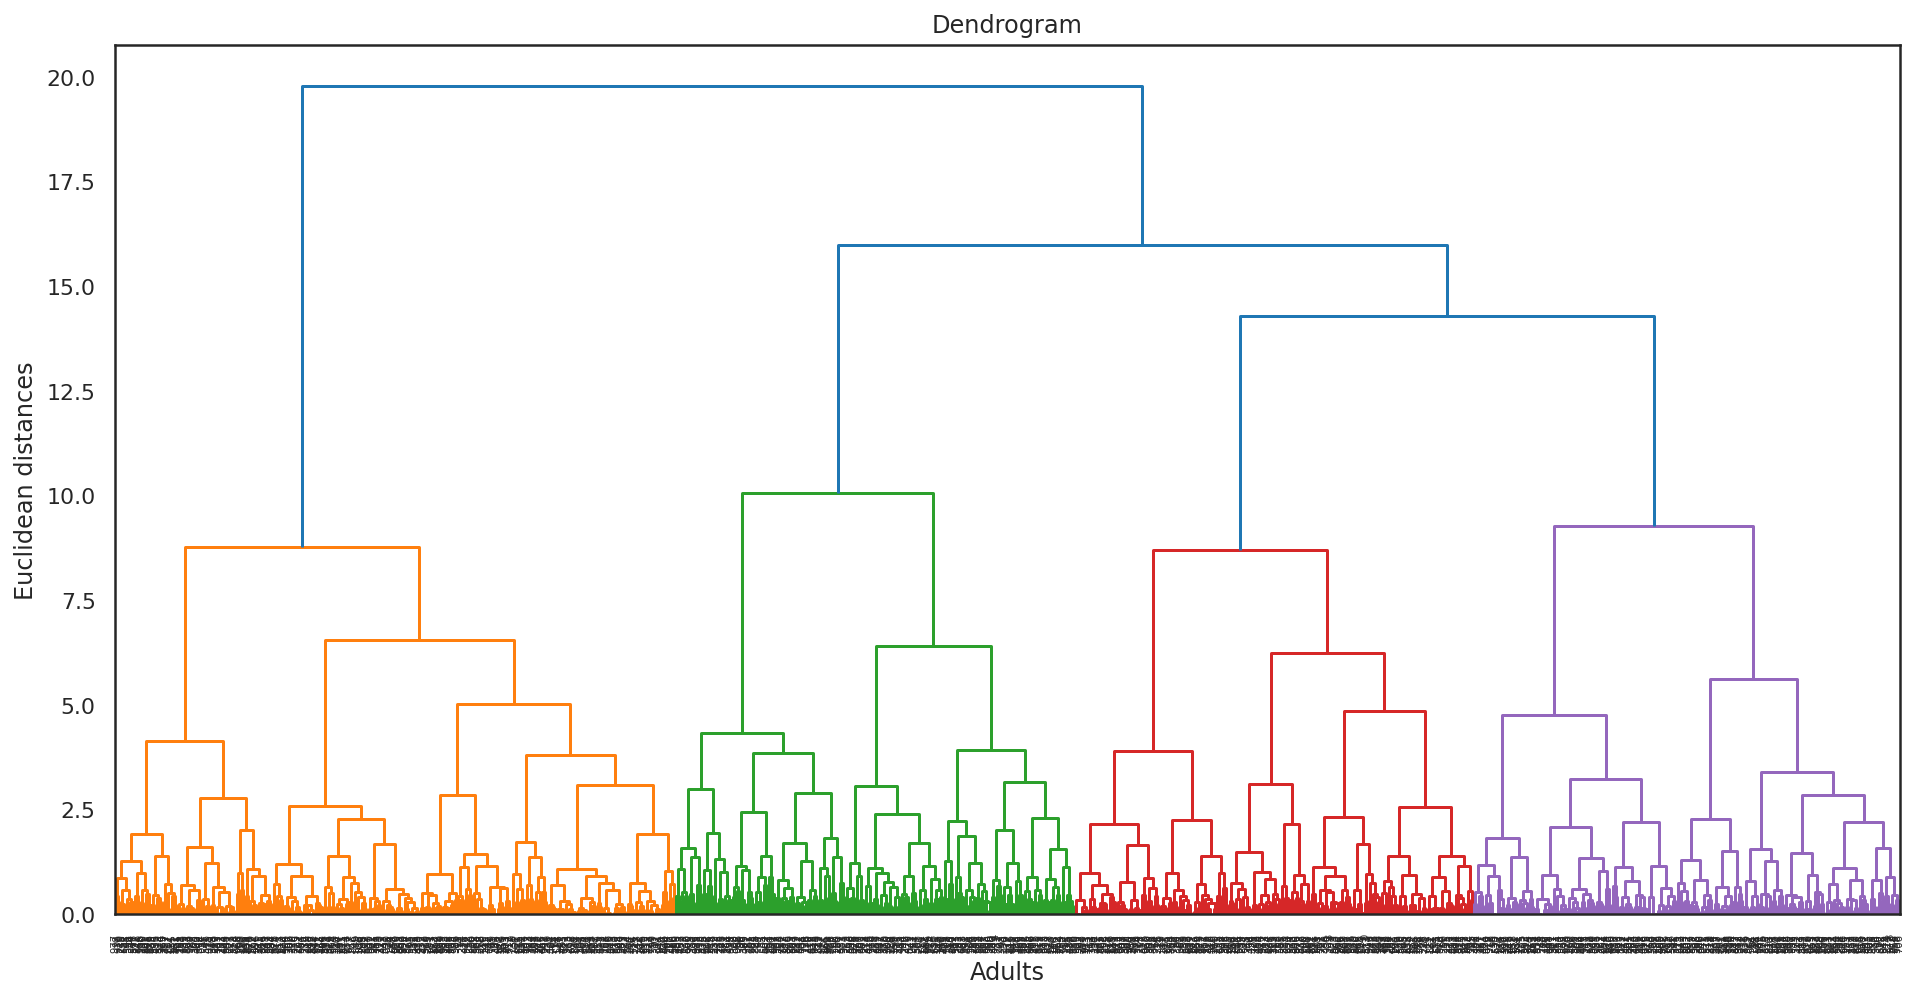

In [12]:
plt.figure(1, figsize = (16 ,8))
links = linkage(normalized_df, method = "ward")
dendrogram = dendrogram(links)

plt.title('Dendrogram')
plt.xlabel('Adults')
plt.ylabel('Euclidean distances')
plt.show()

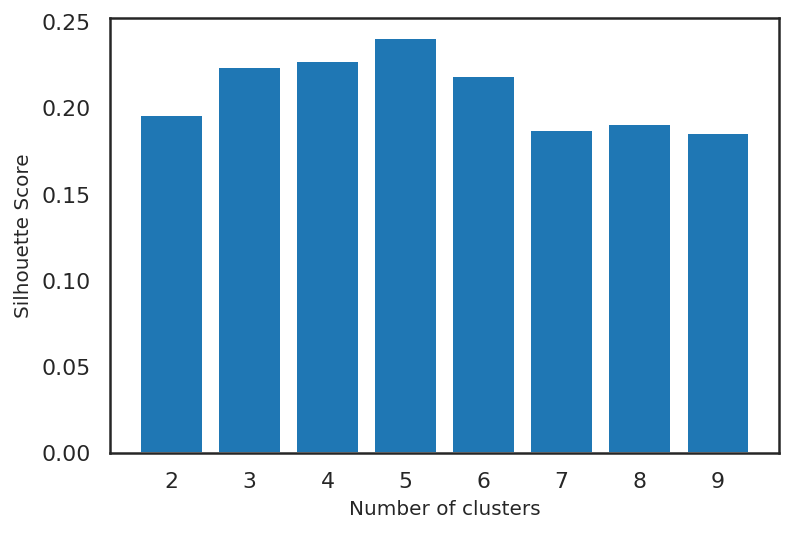

In [13]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [14]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='average')

hc = hc.fit(normalized_df)
hc.labels_

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 2, 5, 2, 0, 4, 3, 5, 3, 4, 4, 4, 5, 4, 4, 1, 0, 5, 0, 3, 4,
       4, 4, 4, 4, 4, 0, 3, 0, 0, 5, 3, 4, 4, 3, 2, 2, 0, 5, 3, 5, 4, 3,
       4, 4, 0, 0, 4, 4, 2, 3, 3, 4, 2, 3, 5, 4, 0, 0, 0, 0, 4, 4, 0, 0,
       4, 4, 4, 2, 2, 5, 4, 4, 4, 5, 4, 2, 1, 5, 0, 0, 3, 4, 0, 4, 2, 4,
       1, 4, 4, 4, 4, 2, 4, 0, 3, 2, 4, 4, 0, 4, 5, 4, 0, 0, 4, 0, 1, 0,
       1, 5, 3, 0, 1, 0, 3, 1, 4, 2, 4, 0, 4, 0, 4, 4, 0, 3, 2, 2, 0, 4,
       4, 4, 4, 2, 5, 5, 5, 0, 4, 4, 1, 2, 4, 0, 2, 4, 5, 0, 5, 1, 2, 5,
       0, 3, 5, 0, 2, 0, 0, 1, 5, 4, 4, 4, 4, 4, 0, 1, 0, 0, 4, 4, 0, 5,
       0, 4, 0, 0, 3, 0, 2, 0, 0, 5, 3, 4, 4, 0, 4, 1, 5, 0, 0, 5, 0, 4,
       2, 4, 2, 3, 5, 4, 5, 4, 0, 4, 4, 3, 4, 2, 4, 0, 5, 0, 3, 3, 0, 4,
       4, 2, 3, 4, 0, 3, 0, 4, 0, 4, 1, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 4,
       5, 0, 4, 0, 2, 2, 0, 1, 0, 0, 4, 2, 0, 0, 4, 0, 5, 3, 0, 0, 0, 4,
       3, 4, 1, 3, 4, 2, 2, 0, 4, 2, 4, 0, 4, 5, 2, 0, 2, 4, 4, 0, 0, 5,
       0, 0, 4, 4, 1, 5, 5, 0, 1, 0, 4, 4, 4, 3, 2,

# Gaussian Mixture Model

We begin by running a gaussian mixture model on the cleaned data for a variety of n_component values between 2 and 10 while calculating the silhouette score for each iteration:

In [15]:
from sklearn.mixture import GaussianMixture

sample_df = df.sample(n = 500, random_state = 42)
gmm_scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components = k, covariance_type = 'full', random_state = 42)
    gmm.fit(sample_df)
    labels = gmm.predict(sample_df)
    score = silhouette_score(sample_df, labels)
    #print(f'Silhouette score for {k} clusters: {score}')
    gmm_scores.append(score)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb919e801f0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb919e801f0>
Traceback 

To visualize our model performance, we plot the silhouette scores.

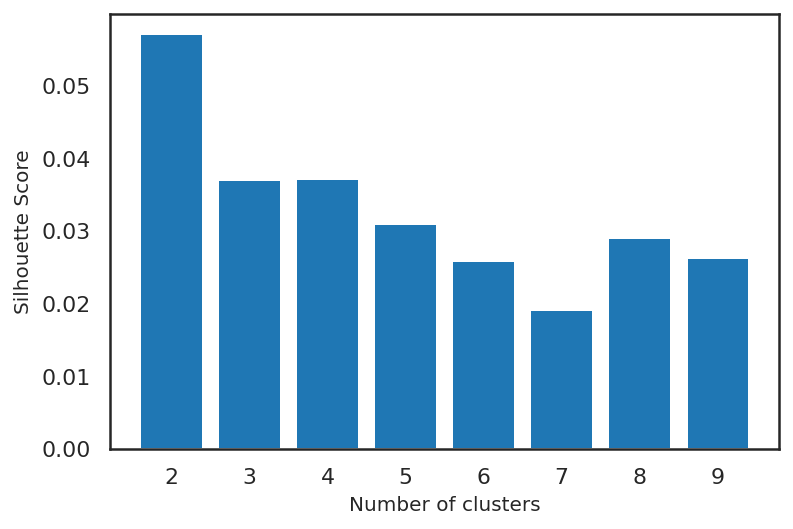

In [16]:
plt.bar(range(2, 10), gmm_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

The score for two clusters is greatest, suggesting that this number of clusters may be the most optimal for our data. However, all the scores are extremely low, suggesting that the clustering produced by GMM's is quite poor. This may be due to the overwhelming amount of binary columns in the data set. To address this, we repeat the process on only the numerical values of the data:

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb919f574c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb919f574c0>
Traceback 

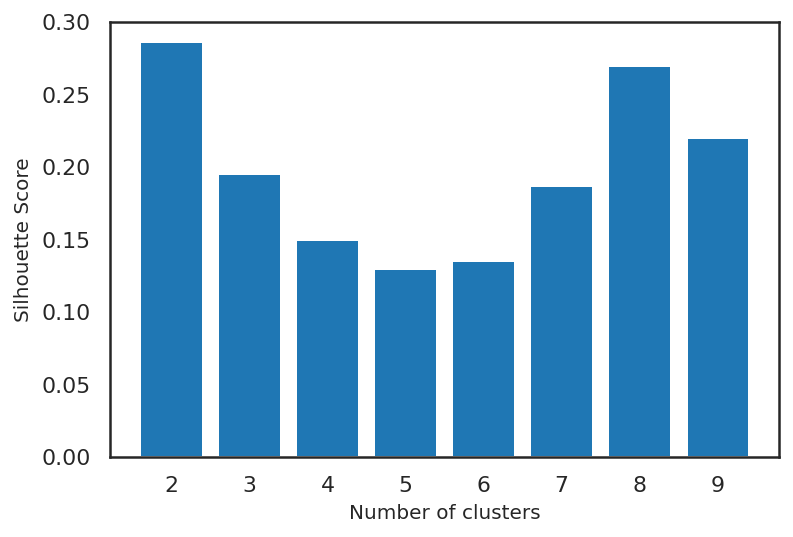

0.2858833266146634


In [17]:
sample_df = df.sample(n = 500, random_state = 42)
sample_df = sample_df.select_dtypes(include=[np.float64])
gmm_scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components = k, covariance_type = 'full', random_state = 42)
    gmm.fit(sample_df)
    labels = gmm.predict(sample_df)
    score = silhouette_score(sample_df, labels)
    #print(f'Silhouette score for {k} clusters: {score}')
    gmm_scores.append(score)
    
plt.bar(range(2, 10), gmm_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

print(gmm_scores[0])

2 components continues to have the highest silhouette score. Addtionally, scores across the board have increased significantly. Despite this, with a max score of 0.2858833266159307, a Gaussian Mixture Model doesn't seem to be producing the best clustering for our data set.

# KMeans

In [18]:
from sklearn.cluster import KMeans

# KMeans clustering
sample_df = df.sample(n = 5000, random_state = 42)
kmeans_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sample_df)
    labels = kmeans.predict(sample_df)
    score = silhouette_score(sample_df, labels)
    kmeans_scores.append(score)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb919f57af0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb919f7b670>
Traceback 

Let's visualize the silhouette scores for K-means.

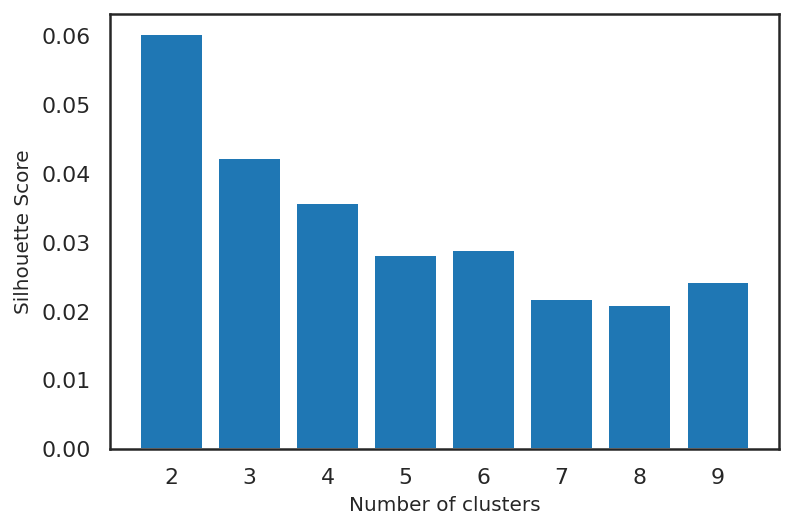

In [19]:
plt.bar(range(2, 10), kmeans_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()

Similar to Guassian Mixture Model, the Silhouette scores for K-means is very low for all clusters, with the score for 2 clusters being the highest. Therefore, let's repeat the process with only the numerical values in the dataset.

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fbbf88dd040>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb919f7bb80>
Traceback 

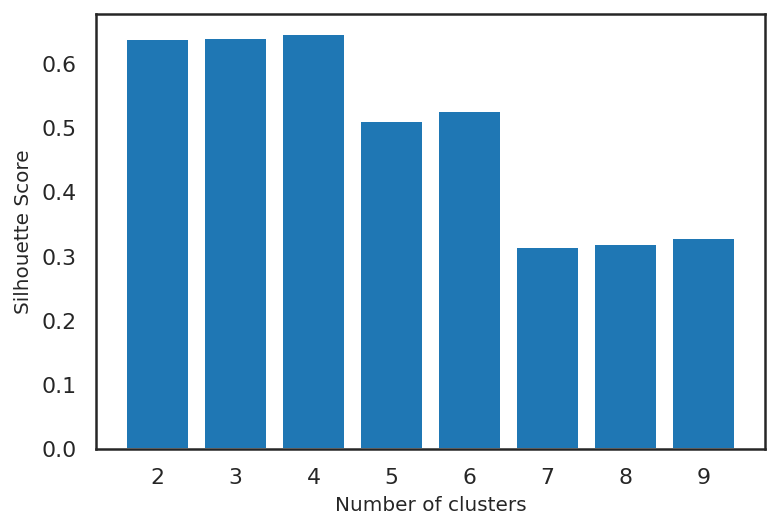

In [20]:
sample_df = df.sample(n = 5000, random_state = 42)
sample_df = sample_df.select_dtypes(include=[np.float64])
kmeans_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sample_df)
    labels = kmeans.predict(sample_df)
    score = silhouette_score(sample_df, labels)
    kmeans_scores.append(score)
    
plt.bar(range(2, 10), kmeans_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

We can see that the Silhouette scores are significantly higher, with the highest scores being for 2, 3, and 4 clusters. 

In [21]:
from kneed import KneeLocator

sse = []
max_k = 10

# Calculate SSE for different values of k
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(sample_df)
    sse.append(kmeans.inertia_)

# Find the elbow point
knee = KneeLocator(range(1, max_k), sse, curve='convex', direction='decreasing')

# Plot SSE curve
plt.plot(range(1, max_k), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k - KMeans')
plt.xticks(range(1, max_k))
plt.axvline(knee.elbow, color='red', linestyle='--', label='Optimal k')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'kneed'

# PCA the dataset

Variance Explained by each Principal Component:
Principal Component 1: 0.04
Principal Component 2: 0.03

Cumulative Variance Explained:
Principal Components 1-1: 0.04
Principal Components 1-2: 0.06

Principal Components:
        0         1         2         3         4         5         6    \
0 -0.023607  0.201084  0.087206 -0.167637 -0.004438  0.129735  0.141744   
1  0.065593  0.115190  0.202985 -0.097552 -0.118043 -0.009662 -0.028109   

        7         8         9    ...       123       124       125       126  \
0  0.101690  0.074569  0.073334  ...  0.090671  0.094630  0.111471  0.027451   
1  0.004027  0.069804 -0.148807  ... -0.151922 -0.129278 -0.132791  0.082550   

        127       128       129       130       131       132  
0 -0.073477  0.031681  0.021020  0.039565 -0.023661 -0.031341  
1 -0.053763 -0.027958 -0.006492 -0.170024  0.002924  0.174360  

[2 rows x 133 columns]


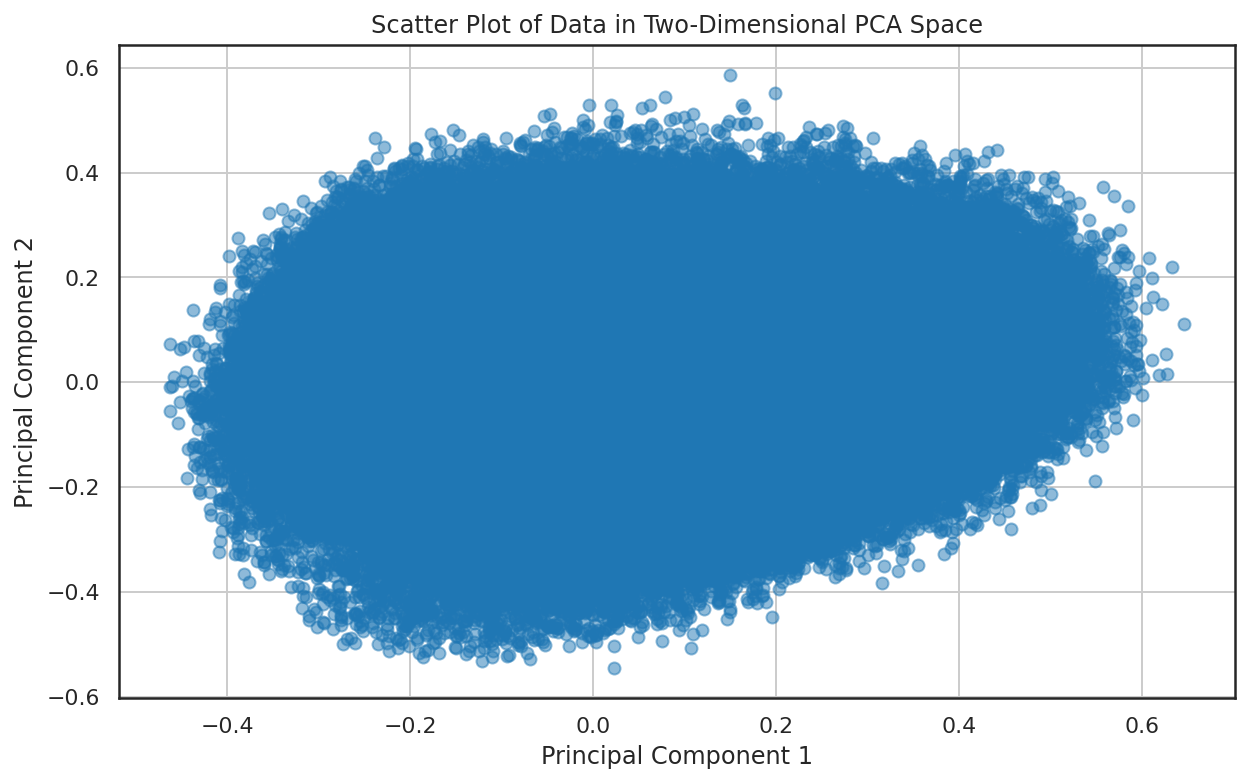

In [34]:
from sklearn.decomposition import PCA

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca.fit(normalized_df)
projected_data = pca.transform(normalized_df)

projected_df = pd.DataFrame(data=projected_data, columns=['PC1', 'PC2'])

# Variance by each Principal Component (first two components)
variance_explained = pca.explained_variance_ratio_
print("Variance Explained by each Principal Component:")
for i, var in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {var:.2f}")

# Cumulative variance 
cumulative_variance_explained = variance_explained.cumsum()
print("\nCumulative Variance Explained:")
for i, cum_var in enumerate(cumulative_variance_explained):
    print(f"Principal Components 1-{i+1}: {cum_var:.2f}")

# All Principal Components and Loadings
components_df = pd.DataFrame(pca.components_, columns=normalized_df.columns)
print("\nPrincipal Components:")
print(components_df)

# Plot the data points in the new two-dimensional space
plt.figure(figsize=(10, 6))
plt.scatter(projected_df['PC1'], projected_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data in Two-Dimensional PCA Space')
plt.grid(True)
plt.show()